In [1]:
from création_data import param_Dataset
import fonction_model as f
from IPython.display import display, Audio
from scipy.io.wavfile import write
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
Fe = 2**16

In [ ]:
def omega_pq (p,q,h,E_nu,rho,Lx,Ly) :    #Calcul analytique des pulsations propres d'une plaque en appuis simple
    return np.sqrt(E_nu*h**2/(12*rho)) * ((p*np.pi/Lx)**2+(q*np.pi/Ly)**2)

def phi_pq (p,q,x,y, Lx, Ly) :  #Calcul analytique des déformées des modes d'une plaque en appuis simple
    """
    ## Inputs
    - p : numéro du mode selon x
    - q : numéro du mode selon y
    - x : arrayLike, vecteur des abscisses
    - y : arrayLike, vecteur des ordonnées

    ## Outputs
    - phi_pq : arrayLike, size (Nx,Ny), déformée du mode (p,q) en tous les points (x,y) du maillage
    """
    return np.sin(p*np.pi*x[:,np.newaxis]/Lx)*np.sin(q*np.pi*y[np.newaxis,:]/Ly)

NB, MB = 3, 3 #Nombre de modes selon x, y
NmB = NB * MB   #Nombre de modes total considéré dans le modèle de plaque

dx, dy = 10e-3, 10e-3
x, y = np.arange(0,Lx,dx), np.arange(0,Ly,dy)
Nx, Ny = len(x), len(y)
X_plate, Y_plate = np.meshgrid(x, y)
X_ravel, Y_ravel = np.ravel(X_plate), np.ravel(Y_plate)

## Calcul des modes

wnB = np.zeros(NmB)
NmB_idx = np.zeros((2,NmB))   #Cette liste permet de remonter du mode contracté "i" au mode réel (n_i,m_i) en appelant NmB_idx[:,i]
j = 0
for n in range(1,NB+1) :
    for m in range(1,MB+1) :
        wnB[j] = omega_pq(n,m, h, E_nu,rhoT,Lx,Ly)
        NmB_idx[0,j] = n
        NmB_idx[1,j] = m
        j += 1

### Tri par ordre de fréquences croissantes
tri_idx = np.argsort(wnB)

wnB = wnB[tri_idx]    #On range les pulsations par ordre croissant 
NmB_idx = NmB_idx[:,tri_idx]      #On ordonne les modes par ordre croissant

### Déformées

phiB_NxNy_NmB = np.zeros((Nx*Ny,NmB)) #Matrice des déformées avec les 2 dimensions spatiales applaties en 1 dimension
for mode in range (NmB) :
    n, m = NmB_idx[0,mode], NmB_idx[1,mode]
    phiB_NxNy_NmB[:,mode] = phi_pq(n, m , x, y, Lx, Ly).ravel()

In [ ]:
plt.figure()
plt.imshow(np.reshape(phiB_NxNy_NmB[:,1],(Nx,Ny)))
plt.show()

## Medium 1:

In [3]:
Fichier = "Data_set_acc_1/plexi/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=10,

                                             article_C = False,
                                             acier_1C = True, # corde de ré
                                             acier_2C = False, # corde de la

                                             medium_1T = True, 
                                             medium_2T = False, 
                                             metal_T = False,
                                             plexi_T = False)

In [4]:
T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[0]


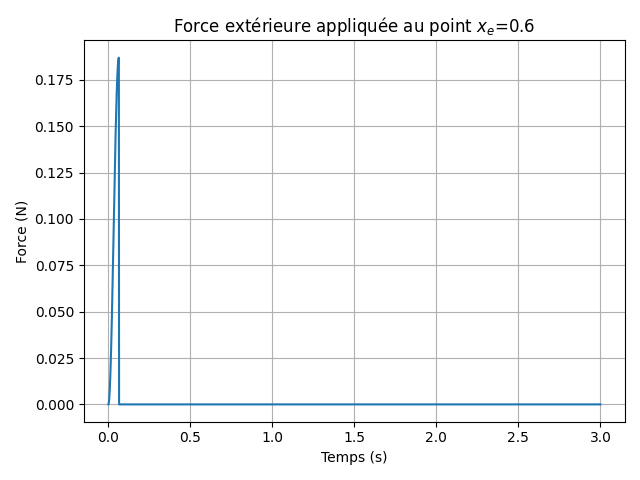

In [5]:

Q,Q_pos, F,phiB_NxNy_NmB= f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 
display(Audio(F,rate=Fe))  ## article

In [ ]:
phiB_NxNy_NmB

In [ ]:
display(Audio(F,rate=Fe))  ## article

In [ ]:
T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[0]
Q = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 

In [ ]:
display(Audio(Q,rate=Fe))  ## acier_2C

In [ ]:
T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[0]
Q = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 
display(Audio(Q,rate=Fe))  ## acier_1C

In [6]:
from scipy.io import wavfile, loadmat
C1P1mat = loadmat("../../Mesures/Mesures_2023.01.27_LAM_normalise/Medium_1/Corde_Acier/C_3_P_4.mat")
acc = C1P1mat["acc_t"].reshape(-1)
fs2 = int(C1P1mat["fs"].reshape(-1))

In [ ]:
display(Audio(acc,rate = fs2))

In [7]:
import numpy as np
Nfft = len(acc)
Y2 = np.fft.rfft(acc, Nfft)
fy2 = np.fft.rfftfreq(Nfft,1/fs2)

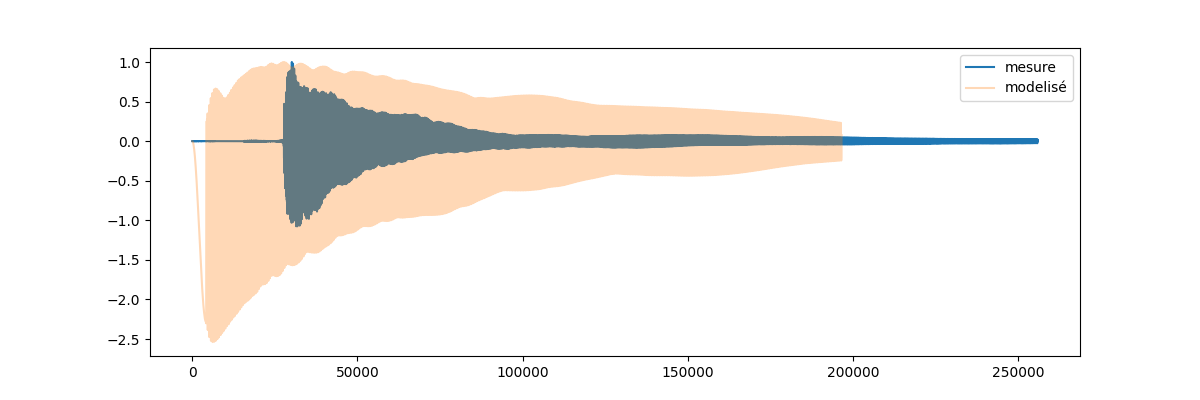

In [8]:
plt.figure(figsize=(12,4))
plt.plot(acc/max(acc),label='mesure')
plt.plot(F/max(F),label='modelisé',alpha = 0.3)
plt.legend()
plt.show()

/var/folders/k2/m05vfpwn0qn71pjn0jnlb0l80000gn/T/ipykernel_77584/885101410.py:22: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,12000)


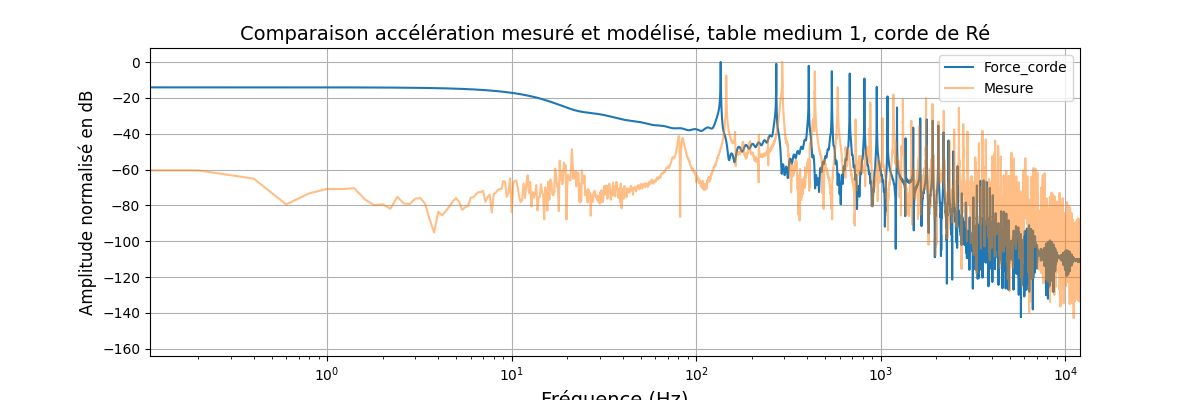

In [9]:

Q_f = np.fft.rfft(Q_pos)
Q_f2 = np.fft.rfft(Q)

F_f1 = np.fft.rfft(F)
#F_f2 = np.fft.rfft(F_2)

freq = np.fft.rfftfreq(len(Q_pos)) * Fe

import matplotlib.pyplot as plt
%matplotlib widget

plt.figure(figsize=(12,4))
#plt.semilogx(freq,20*np.log10(np.abs(Q_f)/np.max(np.abs(Q_f))),label='pos')
#plt.semilogx(freq,20*np.log10(np.abs(Q_f2)/np.max(np.abs(Q_f2))),label='accel')

plt.semilogx(freq,20*np.log10(np.abs(F_f1)/np.max(np.abs(F_f1))),label='Force_corde')
#plt.semilogx(freq,20*np.log10(np.abs(F_f2)/np.max(np.abs(F_f2))),label='Force_table')
#plt.semilogx(freq,20*np.log10(np.abs(F_f2 / F_f)),label='Force dif')

plt.semilogx(fy2, 20*np.log10(np.abs(Y2)/np.max(np.abs(Y2))),label='Mesure',alpha = 0.5)

plt.xlim(0,12000)
plt.legend()
plt.title("Comparaison accélération mesuré et modélisé, table medium 1, corde de Ré",size=14)
plt.xlabel("Fréquence (Hz)",size=14)
plt.ylabel("Amplitude normalisé en dB",size=12)
plt.grid()
plt.show()

In [ ]:
display(Audio(Q,rate=Fe))

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 
    #display(Audio(F,rate=Fe))  
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]

with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)


## medium 2

In [ ]:
Fichier = "1ier_data_set/medium_2/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                             article_C = True,
                                             acier_1C = False,
                                             acier_2C = False, 
                                             medium_1T = False, 
                                             medium_2T = True, 
                                             metal_T = False,
                                             plexi_T = False)

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe)   
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]
    
with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)


## Acier : 

In [ ]:
Fichier = "1ier_data_set/acier/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                             article_C = True,
                                             acier_1C = False,
                                             acier_2C = False, 
                                             medium_1T = False, 
                                             medium_2T = False, 
                                             metal_T = True,
                                             plexi_T = False)

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe)  
    #display(Audio(F,rate=Fe)) 
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]
    
with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)


## Plexi : 

In [ ]:
Fichier = "1ier_data_set/plexi/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                             article_C = True,
                                             acier_1C = False,
                                             acier_2C = False, 
                                             medium_1T = False, 
                                             medium_2T = False, 
                                             metal_T = False,
                                             plexi_T = True)

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe)   
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]

with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)
